
# Project: 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


- Sources: [UCI](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
- The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   **in order to access if the product (bank term deposit) would be (or not) subscribed.**
- **The classification goal** is to predict if the client will subscribe a term deposit (variable y).
>This dataset is public available for research. The details are described in [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt 
                


- Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)
- Number of Attributes: 16 + output attribute.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree
%matplotlib inline

In [2]:
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
#loading and reading the dataset
df = pd.read_csv(r'D:\Downloads\Data Sources\Bank_UCI\bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [8]:
df.y.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

Input variables:
   >bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   #related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   
   > other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  > Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [9]:
df.shape

(45211, 17)

### The structure of your dataset?

> The Dataset contains 45,211 observations(rows) and 17 features as discused in the introduction Section,   7 numerical features and 10 categorical or nominal variables

### The main feature(s) of interest in your dataset?

> for this project, the main objective is understanding the drivers behind customers conversion, age, education job, marital status and their relatioship with the outcome variable (y) which is the conversion


### Data Cleaning 

In [13]:
df_c = df

In [14]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [15]:
df_c['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_c['conversion'].value_counts(normalize = True)

0    0.883015
1    0.116985
Name: conversion, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 

> Analysing Drivers behind Customers' conversion through EDA and Decision Trees

## Univariate Exploration


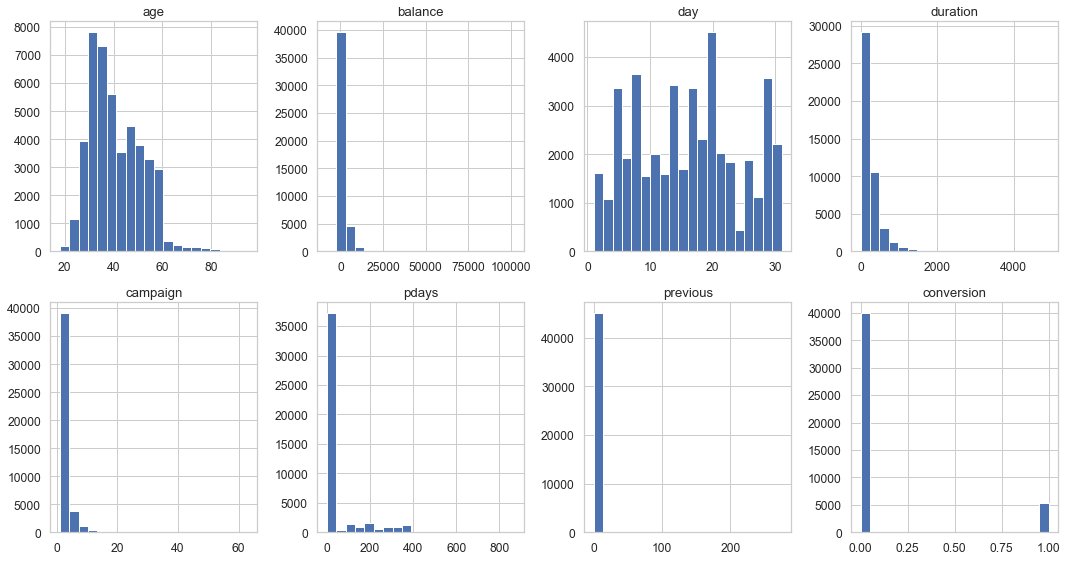

In [16]:
df.select_dtypes('number').hist(bins=20, figsize=(15,8), layout=(2,4))
plt.tight_layout();

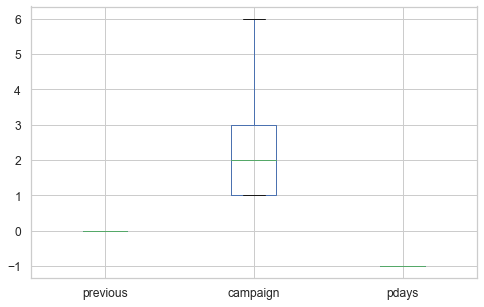

In [12]:
#a closer look at the distribution of some of the variabls closer to zero
df[['previous', 'campaign', 'pdays']].plot.box(showfliers = False);

- Age variable is right skewed, most of the values are between 20 and 40 
- Average Yearly Balances are between 0 and 5000 with outliers reaching 100 K
- Most campaign values are in the lower values (1 <10)
- pdays: -1 means client was not previously contacted
- Conversion : Imbalanced values, Most of the customers in the dataset didn't convert(about 88 %, 12% converted)


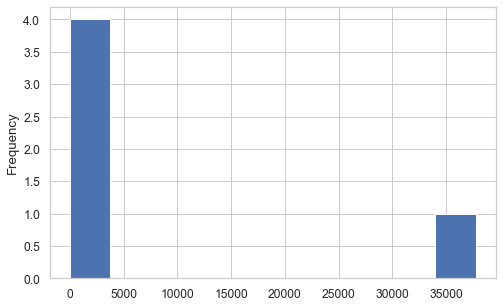

In [116]:
df['balance'].loc[df['balance'] > 0].value_counts(bins = 5).plot(kind='hist');

In [18]:
df.select_dtypes(include='object').nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [29]:
#slicing the categorical variables into a different dataframe to visualize it
df_cat = df.select_dtypes(include='object')

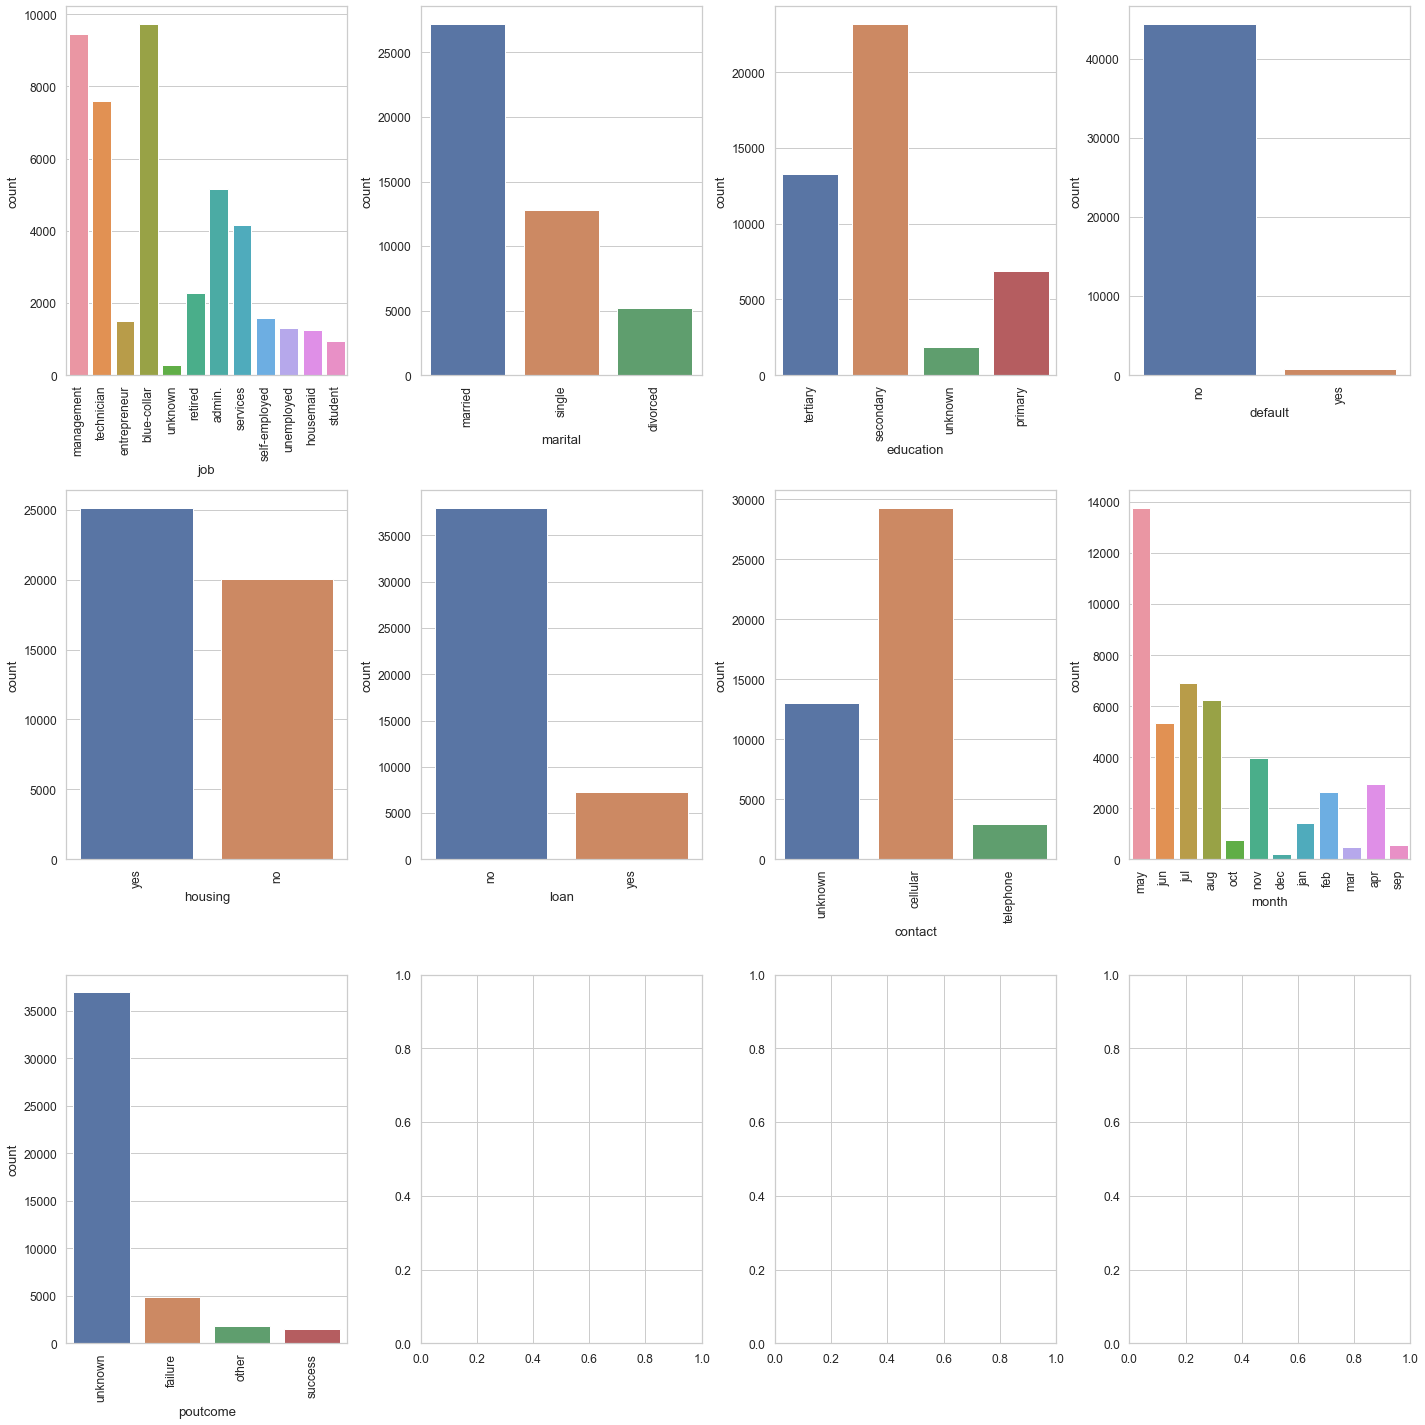

In [28]:
#plotting categorical variables
fig, ax = plt.subplots(3, 4, figsize=(20,20))
for var , subplot in zip(df_cat, ax.flatten()):
    sb.countplot(df_cat[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout();

- Job : Most customers are bluecollar, Management level and technicians
- Most of the customers in the dataset are married
- Secondary Education level is most common in this dataset
- Most Customers didn't default in payment, do not have loans, 
- Most of the contact was via cellular

## Bivariate Exploration & Multivariate Exploration

In [37]:
#average conversion rate by Job title
(df.groupby('job')['conversion'].mean()*100).sort_values(ascending = False).to_frame()

,conversion
job,
student,28.678038
retired,22.791519
unemployed,15.502686
management,13.755551
admin.,12.202669
self-employed,11.842939
unknown,11.805556
technician,11.056996
services,8.883004


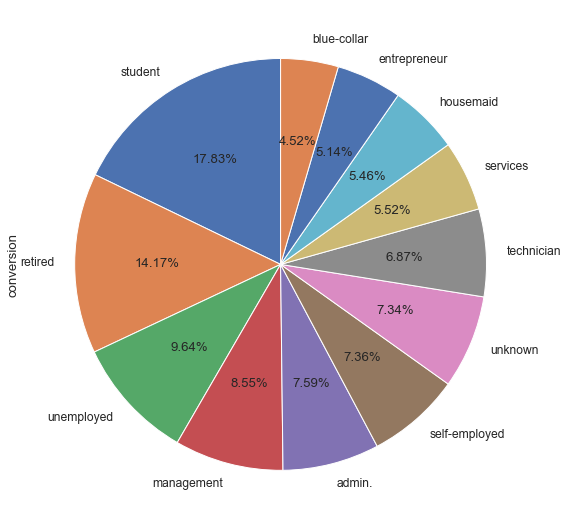

In [65]:
#plotting conversion by job title
conv_by_job = (df.groupby('job')['conversion'].mean()*100).sort_values(ascending = False)
conv_by_job.plot(kind = 'pie' ,startangle =90, figsize = (8,8), autopct ='%.2f%%')
plt.tight_layout();

> Students have the highest conversion rate (buy bank term deposit)then retired and unemployed

In [81]:
#conversion by default value
df_pivoted = pd.pivot_table(df, values='y', index='default', columns='conversion', aggfunc='count')
df_pivoted

conversion,0,1
default,,
no,39159,5237
yes,763,52


Text(0.5, 1.0, 'converted rate by default count')

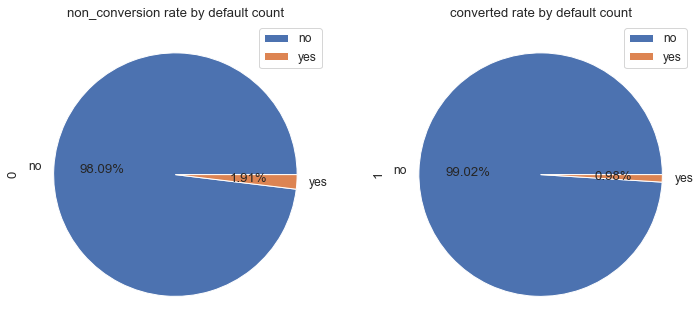

In [90]:
#plotting conversion rate by default count (people who : has credit in default? ( "yes","no") )
ax = df_pivoted.plot(kind='pie', subplots = True, autopct = '%.2f%%', figsize =(12,8))
ax[0].set_title('non_conversion rate by default count')
ax[1].set_title('converted rate by default count');

> the default rate in the non-conversion group is about twice as high as the conversion group.

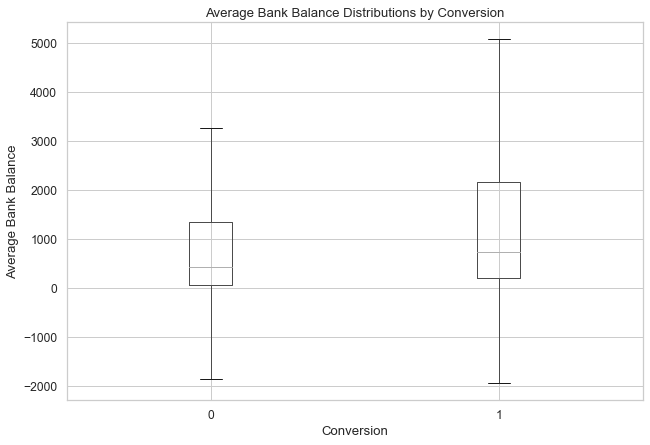

In [117]:
#plotting average bank balance by conversion rate
ax = df[['conversion', 'balance']].boxplot(by='conversion', showfliers=False, figsize=(10, 7)) #excluding outliers to get a better understanding
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("");

In [118]:
#getting the median value of bank balance for the converted Vs non-converted group
df.groupby('conversion')['balance'].median()

conversion
0    417
1    733
Name: balance, dtype: int64

In [119]:
df.groupby('conversion')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
1,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


> the bank balances of converted customers seem to vary more than those of non-converted customers and the median value is higher for the converted group.

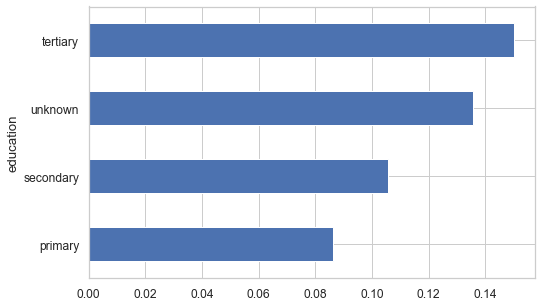

In [44]:
#Conversion by Education
df.groupby('education')['conversion'].mean().sort_values(ascending = True).plot(kind = 'barh');

> Most of the converted are from the Tertiary education 

In [121]:
#conversion rate by number of contacts
df.groupby('contact')['conversion'].mean()

contact
cellular     0.149189
telephone    0.134205
unknown      0.040707
Name: conversion, dtype: float64

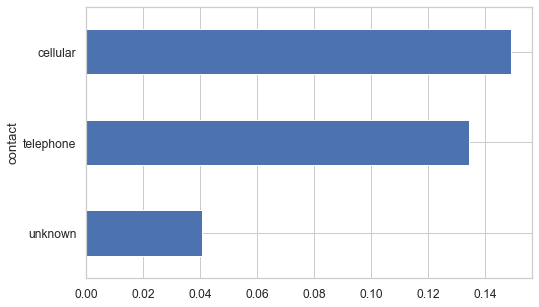

In [47]:
#Conversion by contact
df.groupby('contact')['conversion'].mean().sort_values().plot(kind = 'barh');

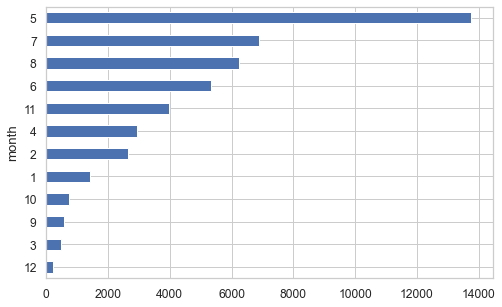

In [190]:
#Conversion by Month
df.groupby('month')['conversion'].count().sort_values().plot(kind = 'barh');

In [16]:
(df.groupby('campaign')['conversion'].mean().sort_values(ascending = False)[:20])*100

campaign
1     14.597583
2     11.203519
3     11.193624
32    11.111111
4      9.000568
17     8.695652
11     7.960199
5      7.879819
6      7.126259
9      6.422018
7      6.394558
29     6.250000
8      5.925926
10     5.263158
24     5.000000
15     4.761905
13     4.511278
14     4.301075
21     2.857143
12     2.580645
Name: conversion, dtype: float64

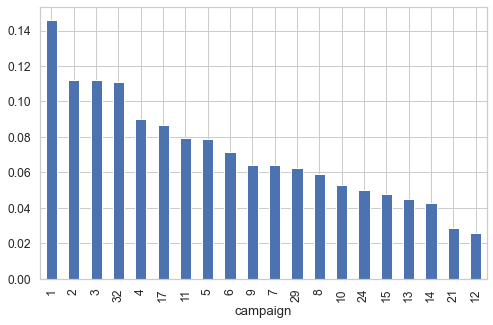

In [131]:
#no of contacts and corresponding average conversion rate
df.groupby('campaign')['conversion'].mean().sort_values(ascending=False)[:20].plot(kind='bar');

> According to the variable description, campaign is the number of **contacts** performed during this campaign and for this client (includes last contact), Less contacts means higher conversion

In [60]:
# Assigning age groups to the dataframe then checking eachh category conversion rate 
df['age_group'] = pd.cut(df['age'], bins=(18,30,40,50,60,70,100), 
                         labels=['18-30','31-40','41-50','51-60','61-70','>70'])
df.groupby('age_group')['conversion'].mean().sort_values(ascending = False)

age_group
>70      0.447639
61-70    0.405136
18-30    0.162154
31-40    0.102448
51-60    0.100533
41-50    0.090666
Name: conversion, dtype: float64

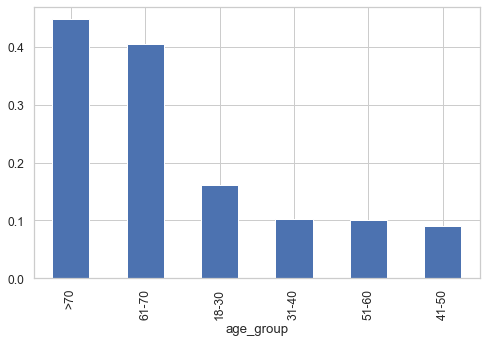

In [62]:
# Average conversion by age group 
df.groupby('age_group')['conversion'].mean().sort_values(ascending =False).plot(kind = 'bar');

> Conversion rates are higher in elder age groups

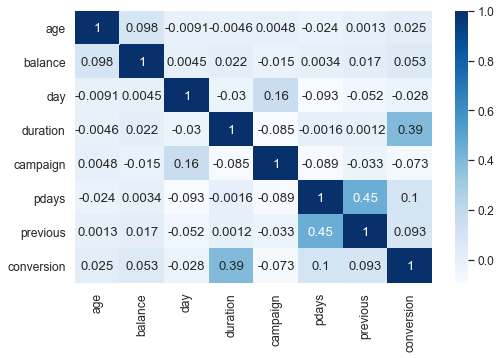

In [54]:
#Heatmap for numerical variables
sb.heatmap(df.corr(), annot=True, cmap='Blues');

> Duration is the last contact duration, has the highest correlation with the conversion

In [154]:
#Using pandas corrwith Method to understand the correlations between the conversion and other numerical variables
y = df_c['conversion']
corr = df.corrwith(y)
corr.sort_values(ascending = False)

conversion    1.000000
duration      0.394521
pdays         0.103621
previous      0.093236
balance       0.052838
age           0.025155
day          -0.028348
campaign     -0.073172
dtype: float64

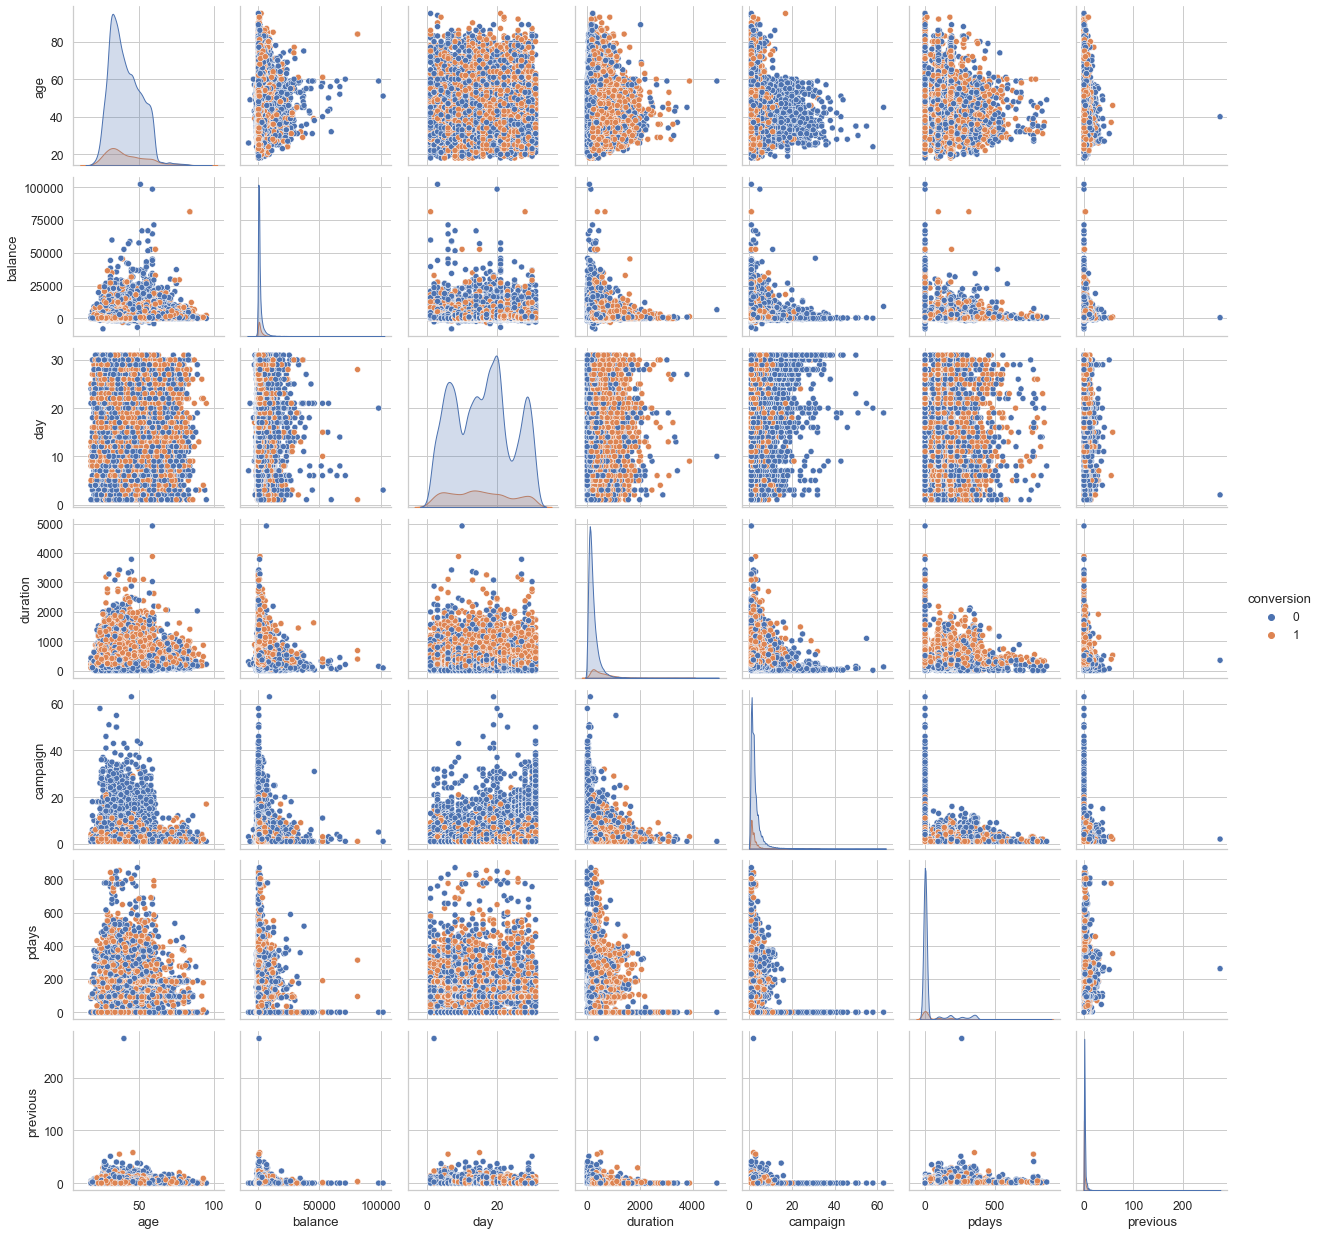

In [50]:
sb.pairplot(df, hue='conversion');

# Decision Trees classifier


## Preprocessing of data

In [174]:
#There are more than 80% unknown values in the poutcome column
#poutcome is the outcome of the previous marketing campaign
df['poutcome'].loc[df['poutcome']=='unknown'].count()/len(df['poutcome'])

0.8174780473778506

In [5]:
#droping the columns poutcome and y 
df_c.drop(columns=['poutcome','y'], axis=1, inplace=True)

In [206]:
#Test
df_c.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month'],
      dtype='object')

In [6]:
#Month is not a categorical feature
df_c['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [7]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov', 'dec']

In [8]:
#encoding the month column with numbers
df_c['month'] = df_c['month'].apply(lambda x: months.index(x)+ 1)
#Test
df_c['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [9]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = ['job','marital','education','contact'] # filtering by string categoricals
data = pd.get_dummies(df_c, columns=one_hot_encode_cols)


In [233]:
#Test
data.head(5).T

,0,1,2,3,4
age,58,44,33,47,33
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
day,5,5,5,5,5
month,5,5,5,5,5
duration,261,151,76,92,198
campaign,1,1,1,1,1
pdays,-1,-1,-1,-1,-1


In [10]:
# encoding yes and no columns
data['housing'] = data['housing'].apply(lambda x :1 if x == 'yes' else 0)
data['loan']    = data['loan'].apply(lambda x :1 if x == 'yes' else 0)
data['default'] = data['default'].apply(lambda x :1 if x == 'yes' else 0)

In [12]:
#Test
data.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
conversion             int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
dtype: object

In [13]:
X = data.drop('conversion', axis=1)
y = data.conversion

In [15]:
model = tree.DecisionTreeClassifier(max_depth=4)

In [16]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=4)

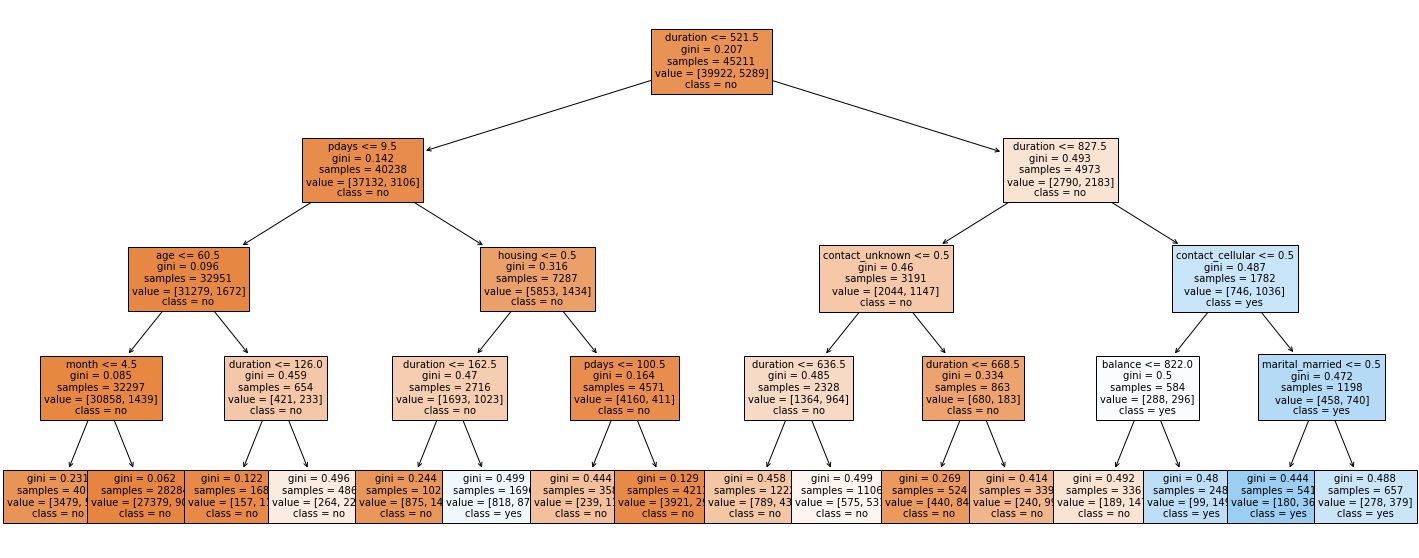

In [17]:
fig = plt.figure(figsize=(25,10))
_   = tree.plot_tree(model, feature_names=X.columns,  
                     class_names=['no','yes']
                     , filled=True, fontsize=10)

### Reducing the Number of features

In [18]:
features = ['age', 'balance', 'housing', 'campaign', 
            'previous', 'job_admin.','job_blue-collar', 'job_entrepreneur',
            'job_housemaid','job_management', 'job_retired', 'job_self-employed',
            'job_services','job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single'
      ]

In [19]:
model_2 = tree.DecisionTreeClassifier(max_depth=4)
model_2.fit(data[features], data['conversion'])

DecisionTreeClassifier(max_depth=4)

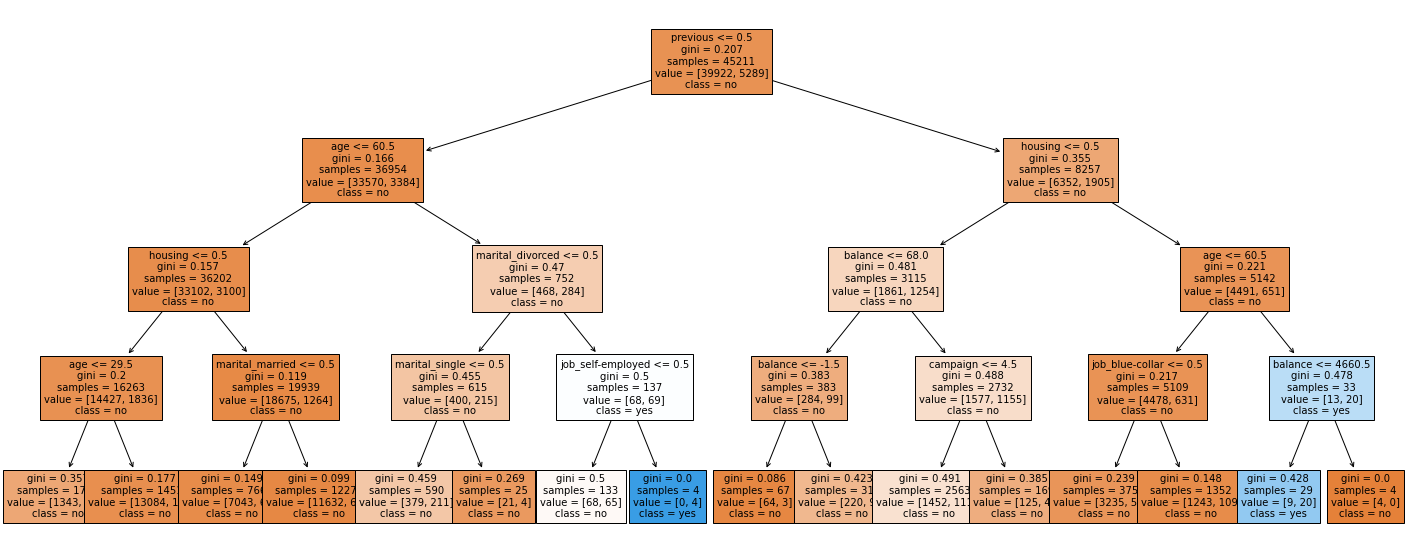

In [20]:
fig = plt.figure(figsize=(25,10), facecolor=None)
out = tree.plot_tree(model_2, feature_names=features,  
                     class_names=['no','yes']
                     , filled=True, fontsize=10)


<a id='conclusions'></a>
## Conclusions

> EDA Findings:
- Age variable is right skewed, most of the values are between 20 and 40
- Average Yearly Balances are between 0 and 5000 with outliers reaching 100 K
- Most campaign values are in the lower values (1 <10)
- pdays: -1 means client was not previously contacted
- Conversion : Imbalanced values, Most of the customers in the dataset didn't convert(about 88 %, 12% converted)
- Job : Most customers are bluecollar, Management level and technicians
- Most of the customers in the dataset are married
- Secondary Education level is most common in this dataset
- Most Customers didn't default in payment, do not have loans,
- Most of the contact was via cellular
- Students have the highest conversion rate (buy bank term deposit)then retired and unemployed
- The default rate in the non-conversion group is about twice as high as the conversion group.
- The bank balances of converted customers seem to vary more than those of non-converted customers and the median value is higher for the converted group.
- Most of the converted are from the Tertiary education
- According to the variable description, campaign is the number of contacts performed during this campaign and for this client (includes last contact), Less contacts means higher conversion
- Conversion rates are higher in elder age groups
- Duration is the last contact duration, has the highest correlation with the conversion

#### Decision Trees Interpretation
> 